# Population genetics

## Heterozygosity

Now, we may go back to the 1000 genomes VCF file we used earlier, and obtain heterozygous positions. For this, we can use `bcftools`. With `-s` samples are selected, and the rows starting on `PSC` are per-sample-counts. This table could be the raw table.

```
# in BASH
bcftools stats -s - ALL.chr18.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz | grep "^PSC" -B 1 > hets.txt
```

Keep in mind that, this as well as many other things can be solved by multiple possible strategies. In this case, I show one version, but there are alternatives.

If you inspect the file, you will see that there is one line per sample, with several columns containing the statistics. Column 6 is the number of Hets.

* Let's have some look at the data!

```
# in R

hets<-read.table("~/test/hets.txt", sep="\t",header=T,comment.char="")


png("hets_histogram.png",600,600)
hist(hets[,6])
dev.off()
```

* Is there a relationship between homozygous alternative (1/1) and heterozygous (0/1) sites?

```
png("hets_vs_homALT.png",600,600)
plot(hets[,5],hets[,6])
dev.off()

cor.test(hets[,5],hets[,6])
```

* Now, I would like to stratify this by population groups. For this, we need to load the metadata and do some merging. Unfortunately, when creating this file, the authors messed with empty columns, so we need to tell `R` to ignore this. Then we merge, taking only the sample ID and heterozygous call columns.


```
meta<-read.table("~/test/integrated_call_samples_v3.20130502.ALL.panel", sep="\t",header=T,fill=T)

head(meta)

hetmet<-merge(hets[,c(3,6)],meta,by.x=1,by.y=1)

head(hetmet)
```

* Just having some fun with statistics in R:

```
mean(hetmet[which(hetmet$pop=="IBS"),2])
mean(hetmet[which(hetmet$pop=="FIN"),2])
wilcox.test(hetmet[which(hetmet$pop=="IBS"),2],hetmet[which(hetmet$pop=="FIN"),2])
```

* Then, let's make a boxplot stratified by continental population (already adding something to nice it up):

```
png("hets_superpop_boxplot.png",600,600)
boxplot(X.6.nHets~super_pop,data=hetmet,
    col=c("blue","green","orange","yellow","red"),
    xlab="Continental population",ylab="Heterozygous sites")
dev.off()
```

This very simple statistic does have a biological meaning, hence it is very informative!

* A final thing: nicely ordering the data by super-population, and plotting the distribution by more specific populations. This requires a bit of `R`-specific data handling, to get a properly sorted dataframe.

```
mypops<-c("AFR","SAS","EUR","EAS","AMR")
sortedpops<-list()
for (npop in mypops) { sortedpops[[npop]]<-unique(hetmet$pop[which(hetmet$super_pop==npop)]) }
hetmetnice<-data.frame(nHets=hetmet[,2],pop=hetmet$pop,super_pop=hetmet$super_pop)
hetmetnice$pop = factor(hetmetnice$pop, levels=unlist(sortedpops))

png("hets_pop_boxplot.png",1200,600)
boxplot(nHets~pop,data=hetmetnice,
    xlab="Continental population",ylab="Heterozygous sites")
#    col=c("blue","green","orange","yellow","red"),
dev.off()
```

Now you can see how the heterozygosities differ between populations. Boxplots are not an ideal way of presenting data, but convenient in base `R`. On a more advanced level, you would want to get a violin plot with individual dots, which requires `R` packages and coding beyond this course.

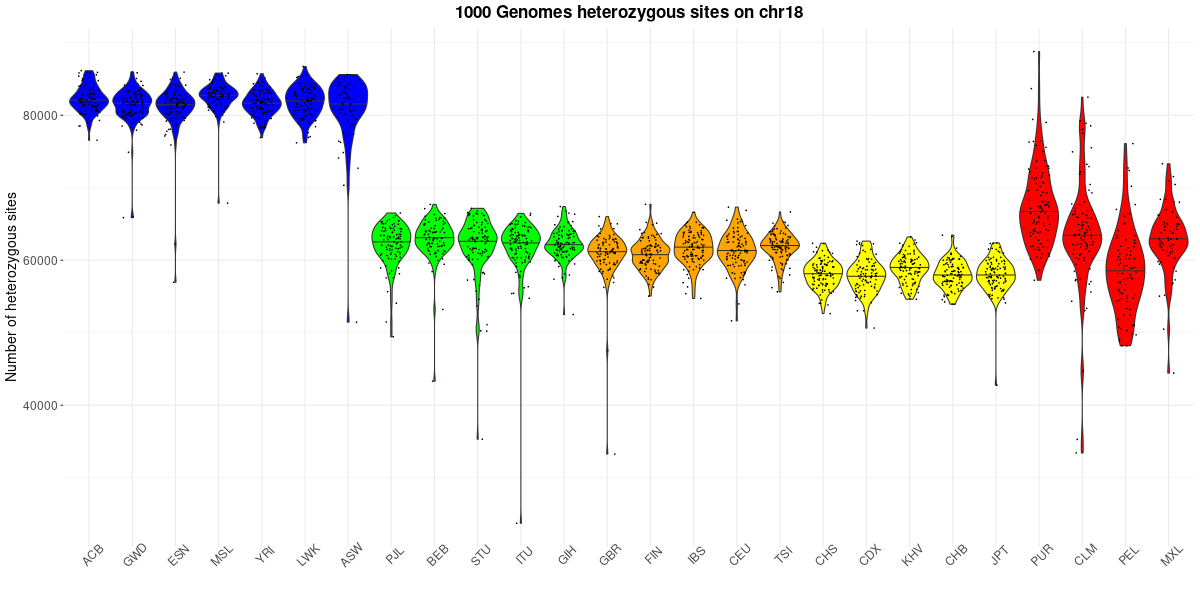

To conclude this course, I will show how you can make a PCA from the 1000 Genomes data!